In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
      --------------------------------------- 0.1/3.0 MB 991.0 kB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 MB 1.0 MB/s eta 0:00:03
     - -------------------------------------- 0.1/3.0 

In [8]:
import yfinance as yf
df_msft = yf.download('MSFT', start='2019-07-04', end='2024-07-02')

[*********************100%%**********************]  1 of 1 completed


In [106]:
df_msft.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-05,135.940002,137.330002,135.720001,137.059998,130.713531,18141100
2019-07-08,136.399994,137.100006,135.369995,136.960007,130.618179,16779700
2019-07-09,136.000000,136.970001,135.800003,136.460007,130.141342,19953100
2019-07-10,137.130005,138.580002,137.020004,137.850006,131.466934,24204400
2019-07-11,138.199997,139.220001,137.869995,138.399994,131.991486,22327900


In [107]:
df_msft.shape

(1256, 6)

In [108]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [109]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,265.750095,268.415796,263.001345,265.850860,261.033817,2.892788e+07
std,78.326155,78.734504,77.831574,78.360555,79.877624,1.253822e+07
min,133.300003,133.929993,130.779999,132.210007,126.088120,8.989200e+06
25%,212.377499,214.767502,210.232498,212.474998,205.603275,2.100665e+07
50%,259.165009,261.500000,255.989998,259.464996,254.320045,2.573990e+07
75%,319.760010,322.622498,316.164993,319.402489,316.044395,3.315278e+07
max,453.070007,457.369995,451.769989,456.730011,456.730011,9.701270e+07


In [110]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Data Cleaning

In [111]:
df_msft.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
df_msft.duplicated().sum()

0

In [21]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-25,448.250000,451.420013,446.750000,450.950012,450.950012,16747500
2024-06-26,449.000000,453.600006,448.190002,452.160004,452.160004,16507000
2024-06-27,452.179993,456.170013,451.769989,452.850006,452.850006,14806300
2024-06-28,453.070007,455.380005,446.410004,446.950012,446.950012,28362300
2024-07-01,448.660004,457.369995,445.660004,456.730011,456.730011,17622500


- we have data till 2/7/24

In [112]:
# we wil make prediction on base of this column 
df_msft['Close']

Date
2019-07-05    137.059998
2019-07-08    136.960007
2019-07-09    136.460007
2019-07-10    137.850006
2019-07-11    138.399994
                 ...    
2024-06-25    450.950012
2024-06-26    452.160004
2024-06-27    452.850006
2024-06-28    446.950012
2024-07-01    456.730011
Name: Close, Length: 1256, dtype: float64

In [24]:
# close columns indicates the proce closed for every day
df_close=df_msft.reset_index()['Close']

In [25]:
df_close

0       137.059998
1       136.960007
2       136.460007
3       137.850006
4       138.399994
           ...    
1251    450.950012
1252    452.160004
1253    452.850006
1254    446.950012
1255    456.730011
Name: Close, Length: 1256, dtype: float64

In [27]:
df_close.shape

(1256,)

#### visualizing our new data frame df_close

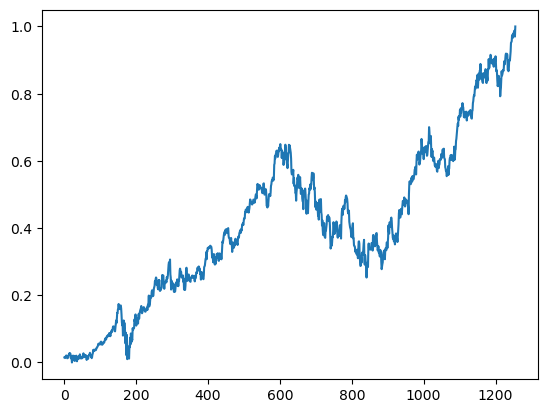

In [113]:
plt.plot(df_close)

### Feature Engineering
- As we know LSTM is very sensitive to the scale of data,so we need to normalize it
- Normalization
   - Min/Max Scaler

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler = MinMaxScaler(feature_range=(0, 1))


In [116]:
from numpy import array
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [117]:
df_close

array([[0.01494512],
       [0.014637  ],
       [0.01309627],
       ...,
       [0.98804387],
       [0.96986319],
       [1.        ]])

- Now it ranges from 0-1,hence normalized!

### Train/test split
- In case of time series data ,we should divide data on base of Date

In [118]:
train_size = int(len(df_close) * 0.65)
test_size = len(df_close) - train_size


In [119]:
train_data,test_data=df_close[0:train_size,:],df_close[train_size:len(df_close)]

In [120]:
len(test_data),len(train_data)

(440, 816)

In [121]:
#parameter tuning
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):#start with 0,1,2 (only 1 step)
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99  Y_train 100 
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [122]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [123]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [124]:
#reshaping accoridng to LSTM requirement
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
#stack LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [126]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                      │ (None, 100, 50)               │      10,400 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_4 (LSTM)                      │ (None, 100, 50)               │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_5 (LSTM)                      │ (None, 50)                    │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - loss: 0.0855 - val_loss: 0.0609
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0086 - val_loss: 0.0075
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0044 - val_loss: 0.0161
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 0.0020 - val_loss: 0.0075
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 5.0761e-04 - val_loss: 8.2669e-04
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 4.9638e-04 - val_loss: 0.0024
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 5.6635e-04 - val_loss: 9.8836e-04
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 5.6148e-04 - val_loss: 5.5356e-04
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 5.1799e-04 - val_loss: 4.7165e-04
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 6.3441e-04 - val_loss: 5.7520e-04
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 5.6278e-04 - val_loss: 0.0021
Epoch 73/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 5.3858e-04 - val_loss: 5.2405e-04
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 4.9044e-04 - val_loss: 0.0011
Epoch 75/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 4.9914e-04 - val_loss: 0.0012
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 4.3899e

In [81]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [83]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [84]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.01875657891422853

In [85]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.02258175076077895

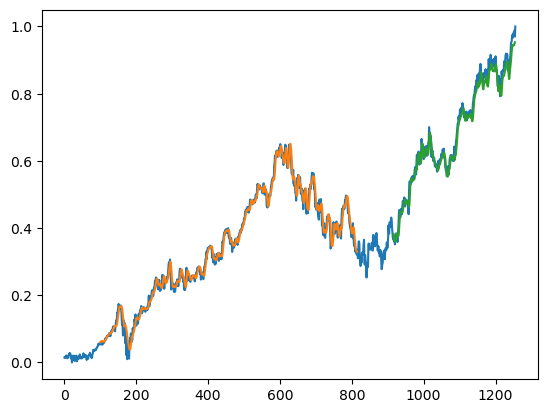

In [88]:
look_back=100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [95]:
lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        # Take the last 100 elements for prediction
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        
        # Reshape for the LSTM model
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Predict the next value
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        
        # Extend temp_input and lst_output with the predicted value
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        # For the first prediction, reshape temp_input directly
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps, 1))
        
        # Predict the next value
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        
        # Extend temp_input and lst_output with the predicted value
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


[0.95461106]
1 day input [0.86866749 0.88851219 0.87221126 0.84466288 0.8544311  0.8454024
 0.83769872 0.83378528 0.83190553 0.86108709 0.85705037 0.84842228
 0.8482374  0.84897692 0.86721929 0.87295079 0.87116357 0.83335383
 0.83162821 0.85335266 0.84435471 0.83911617 0.87227286 0.87171822
 0.90290272 0.87578579 0.87855909 0.89116231 0.90293356 0.91569082
 0.91374947 0.89563039 0.89190183 0.89122391 0.88903609 0.90089978
 0.89125475 0.88820412 0.88028471 0.90382712 0.90096138 0.90616907
 0.89686306 0.91125349 0.8926722  0.86721929 0.87011579 0.86167258
 0.8383458  0.82247623 0.82814613 0.84851472 0.85310609 0.82222975
 0.84466288 0.83212126 0.79230857 0.80959569 0.81853194 0.84571057
 0.86691112 0.8539689  0.8576667  0.86315172 0.87060884 0.86746577
 0.87621714 0.89630832 0.88986805 0.8874645  0.90327248 0.91467397
 0.9192345  0.90838774 0.91812521 0.91861826 0.91507458 0.87039321
 0.87181066 0.86684943 0.87470725 0.89917416 0.90074565 0.89868112
 0.91106861 0.92589049 0.95171326 0.95

10 day output [[0.82599616]]
11 day input [0.85705037 0.84842228 0.8482374  0.84897692 0.86721929 0.87295079
 0.87116357 0.83335383 0.83162821 0.85335266 0.84435471 0.83911617
 0.87227286 0.87171822 0.90290272 0.87578579 0.87855909 0.89116231
 0.90293356 0.91569082 0.91374947 0.89563039 0.89190183 0.89122391
 0.88903609 0.90089978 0.89125475 0.88820412 0.88028471 0.90382712
 0.90096138 0.90616907 0.89686306 0.91125349 0.8926722  0.86721929
 0.87011579 0.86167258 0.8383458  0.82247623 0.82814613 0.84851472
 0.85310609 0.82222975 0.84466288 0.83212126 0.79230857 0.80959569
 0.81853194 0.84571057 0.86691112 0.8539689  0.8576667  0.86315172
 0.87060884 0.86746577 0.87621714 0.89630832 0.88986805 0.8874645
 0.90327248 0.91467397 0.9192345  0.90838774 0.91812521 0.91861826
 0.91507458 0.87039321 0.87181066 0.86684943 0.87470725 0.89917416
 0.90074565 0.89868112 0.91106861 0.92589049 0.95171326 0.95331559
 0.95636631 0.97423883 0.96798344 0.96601134 0.97858372 0.97208185
 0.98218908 0.9859176

19 day output [[0.7566132]]
20 day input [0.85335266 0.84435471 0.83911617 0.87227286 0.87171822 0.90290272
 0.87578579 0.87855909 0.89116231 0.90293356 0.91569082 0.91374947
 0.89563039 0.89190183 0.89122391 0.88903609 0.90089978 0.89125475
 0.88820412 0.88028471 0.90382712 0.90096138 0.90616907 0.89686306
 0.91125349 0.8926722  0.86721929 0.87011579 0.86167258 0.8383458
 0.82247623 0.82814613 0.84851472 0.85310609 0.82222975 0.84466288
 0.83212126 0.79230857 0.80959569 0.81853194 0.84571057 0.86691112
 0.8539689  0.8576667  0.86315172 0.87060884 0.86746577 0.87621714
 0.89630832 0.88986805 0.8874645  0.90327248 0.91467397 0.9192345
 0.90838774 0.91812521 0.91861826 0.91507458 0.87039321 0.87181066
 0.86684943 0.87470725 0.89917416 0.90074565 0.89868112 0.91106861
 0.92589049 0.95171326 0.95331559 0.95636631 0.97423883 0.96798344
 0.96601134 0.97858372 0.97208185 0.98218908 0.98591764 0.98804387
 0.96986319 1.         0.95461106 0.94785452 0.9350003  0.9198432
 0.90422577 0.88895196 0

27 day output [[0.7077077]]
28 day input [0.89116231 0.90293356 0.91569082 0.91374947 0.89563039 0.89190183
 0.89122391 0.88903609 0.90089978 0.89125475 0.88820412 0.88028471
 0.90382712 0.90096138 0.90616907 0.89686306 0.91125349 0.8926722
 0.86721929 0.87011579 0.86167258 0.8383458  0.82247623 0.82814613
 0.84851472 0.85310609 0.82222975 0.84466288 0.83212126 0.79230857
 0.80959569 0.81853194 0.84571057 0.86691112 0.8539689  0.8576667
 0.86315172 0.87060884 0.86746577 0.87621714 0.89630832 0.88986805
 0.8874645  0.90327248 0.91467397 0.9192345  0.90838774 0.91812521
 0.91861826 0.91507458 0.87039321 0.87181066 0.86684943 0.87470725
 0.89917416 0.90074565 0.89868112 0.91106861 0.92589049 0.95171326
 0.95331559 0.95636631 0.97423883 0.96798344 0.96601134 0.97858372
 0.97208185 0.98218908 0.98591764 0.98804387 0.96986319 1.
 0.95461106 0.94785452 0.9350003  0.9198432  0.90422577 0.88895196
 0.87439883 0.86076641 0.848153   0.83657789 0.82599616 0.81631565
 0.80741298 0.79915261 0.791399

In [98]:
day_new=np.arange(1,100)
day_pred=np.arange(100,130)

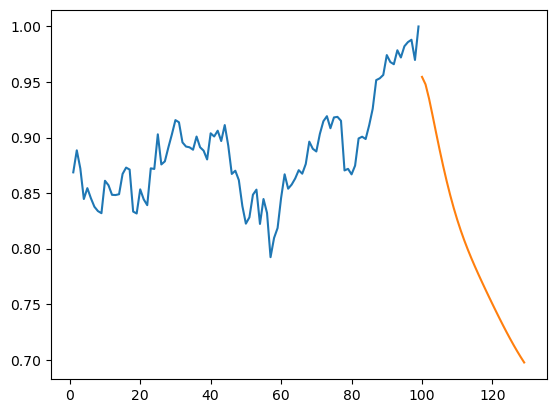

In [102]:
plt.plot(day_new,scaler.inverse_transform(df_close[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

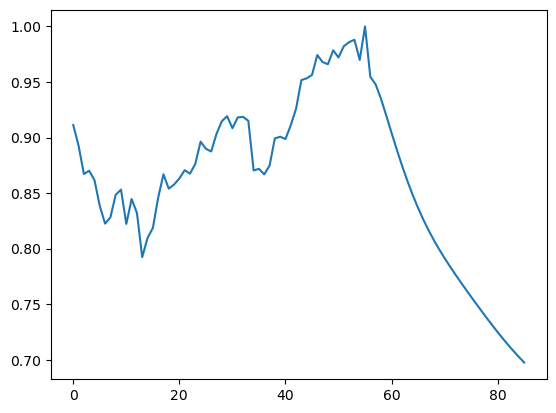

In [103]:
df3=df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

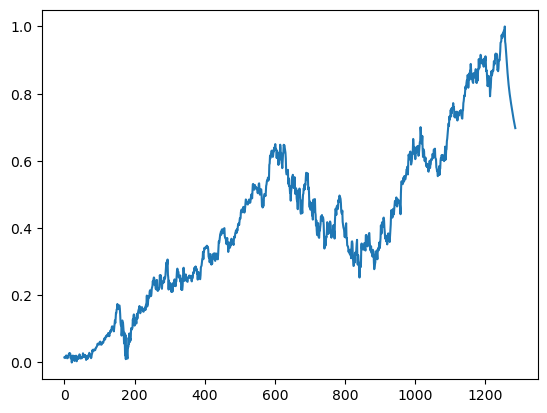

In [104]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)